# Proyecto de Día 11 - Análisis Predictivo para una Tienda Minorista

### Objetivo
Tu tarea consiste en desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Carga el conjunto de datos y realiza cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.


**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Utiliza el conocimiento que has adquirido sobre diferentes algoritmos para elegir el modelo más adecuado para esta tarea. Considera la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrena tu modelo seleccionado en el conjunto de entrenamiento y evalúa su rendimiento utilizando el conjunto de prueba. Utiliza gráficos para visualizar las *ventas reales* vs. *las predichas*.

**5. Conclusión**

- Basado en los resultados iniciales, resume tus hallazgos y realiza recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.


### Nota
* Enfócate en la claridad y simplicidad de tu código.

¡Mucha Suerte!

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Preparacion de los Datos

In [3]:
df = pd.read_csv('Ventas.csv')
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [6]:
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


In [ ]:
print(df['Festivo'].unique())
print(df['Promociones'].unique())
print(df['DíaDeLaSemana'].unique())

[0 1]
[0 1]
[6 7 1 2 3 4 5]


In [5]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [45]:
X = df.drop(columns=['Fecha', 'Ventas'])
X.head()

,DíaDeLaSemana,Promociones,Festivo
0,6,0,0
1,7,0,1
2,1,0,0
3,2,1,0
4,3,0,0


In [9]:
y = df['Ventas']
y.head()

0    4033
1    4012
2    1608
3    2046
4    2484
Name: Ventas, dtype: int64

In [10]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.9, random_state=42)

## Analisis Exploratorio de los Datos

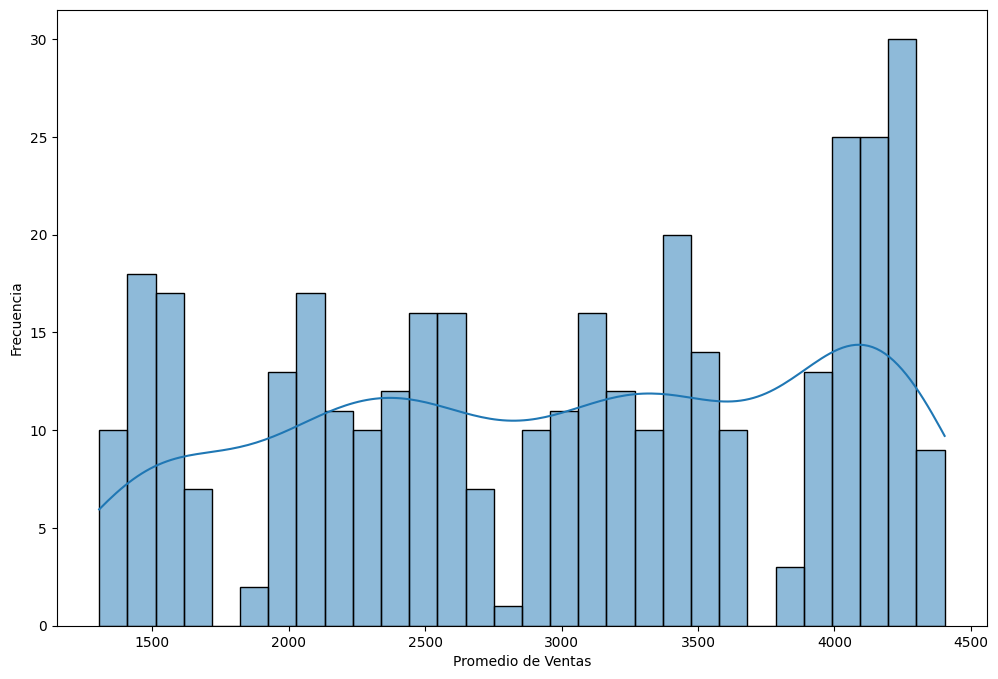

In [21]:
plt.figure(figsize=(12, 8))
hist = sns.histplot(x='Ventas', data=df, bins=30, kde=True)
hist.set_xlabel('Promedio de Ventas')
hist.set_ylabel('Frecuencia')
plt.show()


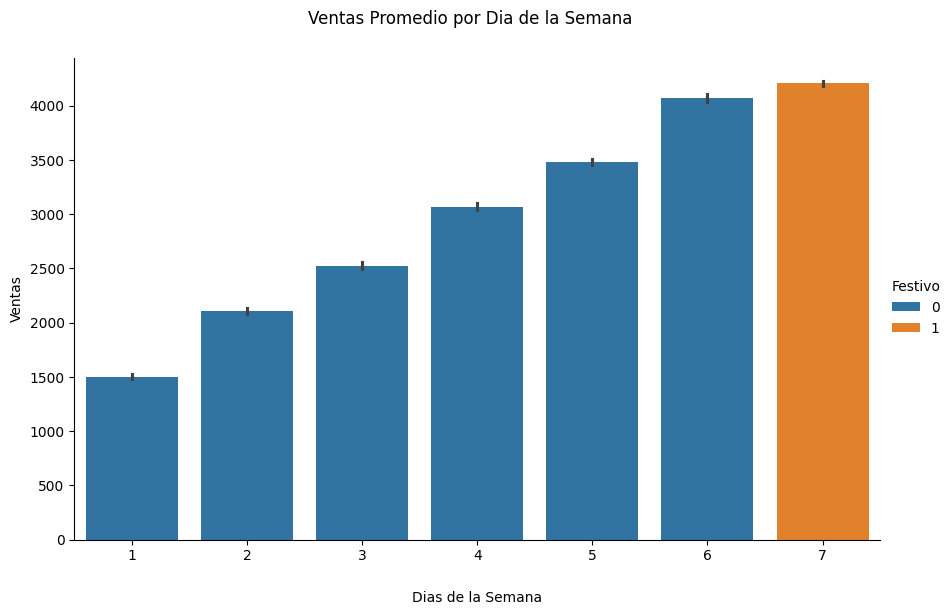

In [32]:
barplot = sns.catplot(data=df, x='DíaDeLaSemana', y='Ventas', kind='bar', hue='Festivo', height=6, aspect=1.5)
barplot.set_xlabels('Dias de la Semana', 'Ventas Promedio', labelpad=20)
barplot.figure.suptitle('Ventas Promedio por Dia de la Semana')
barplot.figure.subplots_adjust(top=0.9)

Text(0.5, 1.0, 'Interaccion entre Promociones y Dias Festivos en las Ventas')

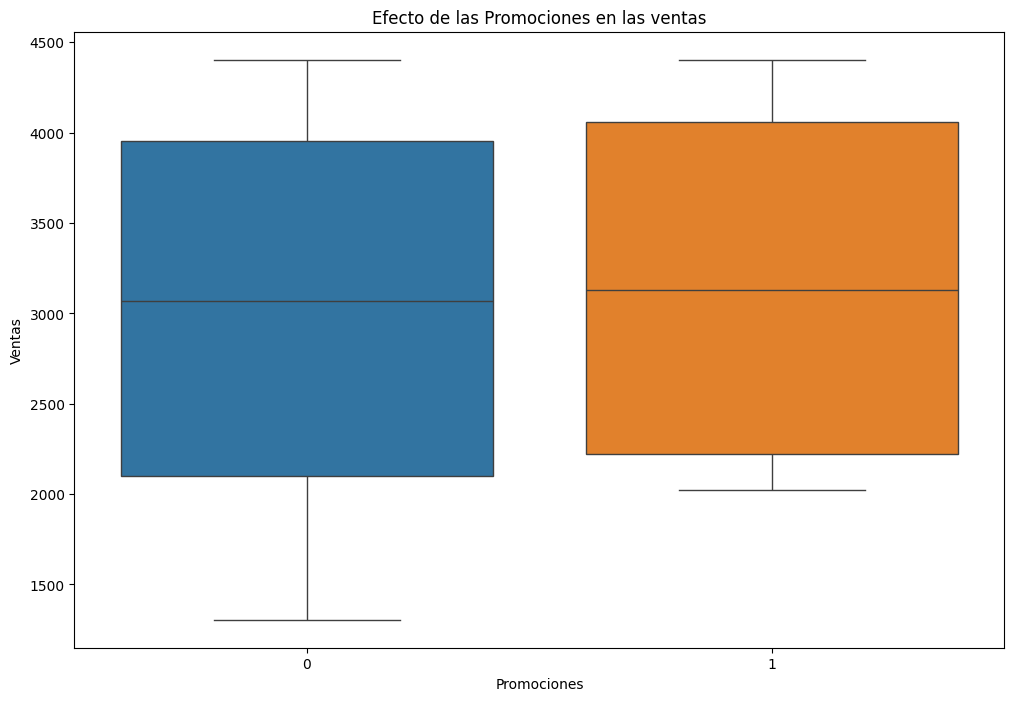

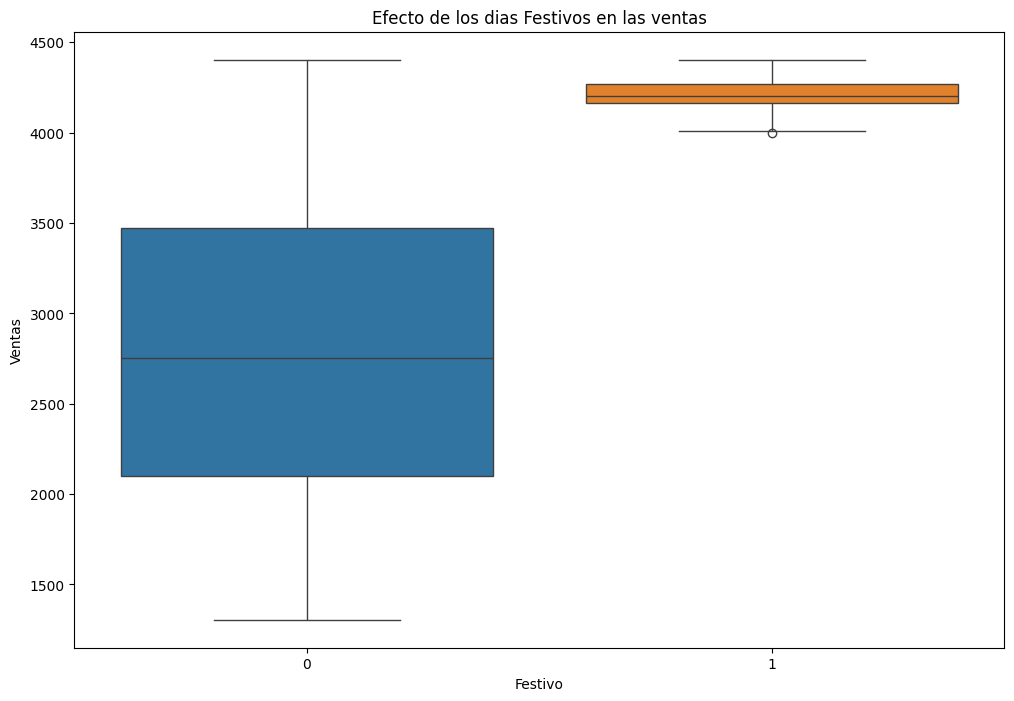

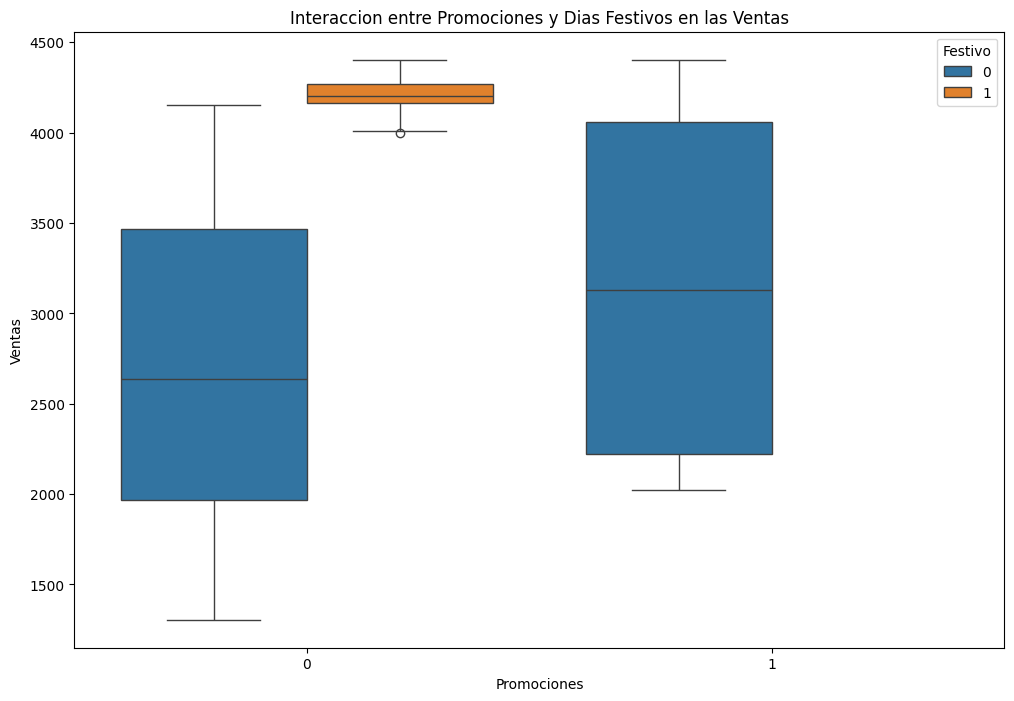

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Promociones', y='Ventas', hue='Promociones', legend=False)
plt.title('Efecto de las Promociones en las ventas')

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Festivo', y='Ventas', hue='Festivo', legend=False)
plt.title('Efecto de los dias Festivos en las ventas')

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Promociones', y='Ventas', hue='Festivo')
plt.title('Interaccion entre Promociones y Dias Festivos en las Ventas')

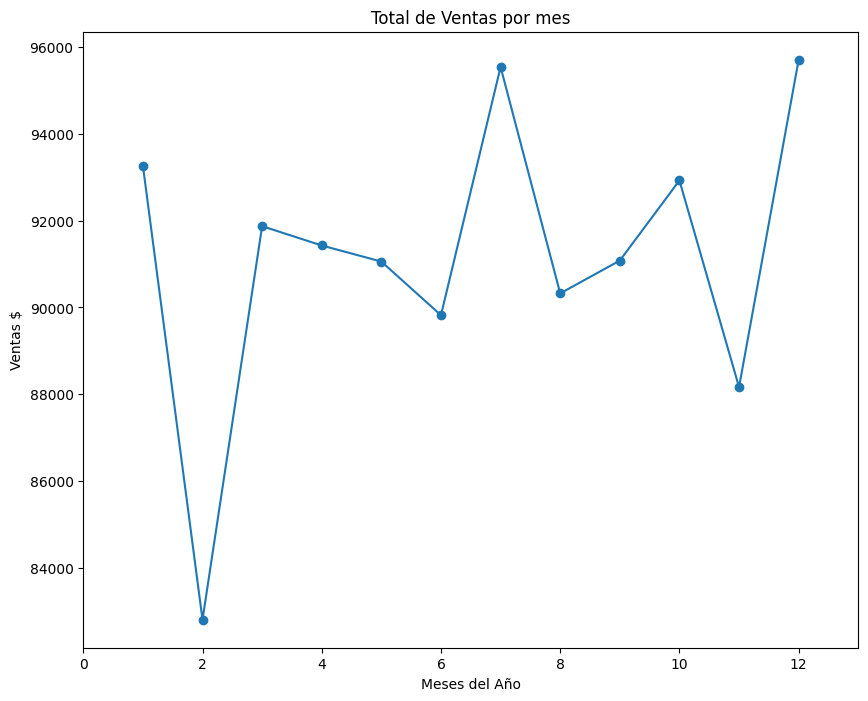

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(df['Fecha'].dt.month.unique(), ventas_por_mes, marker='o')
plt.xlabel('Meses del Año')
plt.ylabel('Ventas $')
plt.title('Total de Ventas por mes')
plt.xlim((0, 13))

plt.show()

## Seleccion del Modelo

In [44]:
modelos = [
    ('Regresion Lineal', LinearRegression()),
    ('Arbol de Decision', DecisionTreeRegressor(random_state=42)),
    ('Bosque Aleatorio', RandomForestRegressor(random_state=42, max_depth=15, n_estimators=150))
]

In [47]:
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'{nombre}: {puntaje}')
    

Regresion Lineal: 0.9910212863051017
Arbol de Decision: 0.9909681365081849
Bosque Aleatorio: 0.9909851482431044


## Entrenamiento y Evaluacion del modelo

#### Utilizando RandomForest y TimeSeriesSplit

In [48]:
tss = TimeSeriesSplit(n_splits=5)

In [96]:
#Usamos TimeSeriesSplit para seleccionar datos de entrenamiento y prueba que vayan aumentado progresivamente
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)

    print(f'Ventas: {y_test}')
    print(f'Ventas Predichas: {np.round(y_pred, 2)}')

Ventas: 65     1657
66     1947
67     2369
68     3085
69     3653
70     4060
71     4131
72     1512
73     2044
74     2561
75     3141
76     3494
77     4070
78     4256
79     1602
80     2061
81     2449
82     2946
83     3462
84     4056
85     4265
86     1550
87     2131
88     2377
89     3067
90     3496
91     3973
92     4064
93     1620
94     1954
95     2659
96     3073
97     3627
98     4134
99     4191
100    1635
101    2076
102    2660
103    3204
104    3524
105    3972
106    4282
107    1539
108    1966
109    2531
110    2944
111    3626
112    3848
113    3996
114    1426
115    2083
116    2502
117    3188
118    3590
119    4044
120    4228
121    1506
122    2289
123    2598
124    3038
Name: Ventas, dtype: int64
Ventas Predichas: [1471.82 2004.05 2551.68 3002.71 3485.44 4100.4  4203.96 1471.82 2004.05
 2551.68 3140.18 3485.44 3975.07 4203.96 1471.82 2004.05 2551.68 3002.71
 3485.44 4100.4  4203.96 1471.82 2169.3  2551.68 3002.71 3485.44 3975.07
 4203.96

In [ ]:
#Creamos una segunda X_test con los valores no tomados por TimeSeriesSplit
X_test_2 = X.iloc[[i for i in range(0,66)]]


In [51]:
predict = modelo.predict(X_test_2)
predict = np.round(predict, 2)
predict

array([3985.41, 4193.51, 1501.78, 2174.44, 2528.09, 3142.31, 3483.18,
       3985.41, 4193.51, 1501.78, 2011.6 , 2528.09, 3142.31, 3483.18,
       4165.08, 4193.51, 1501.78, 2174.44, 2528.09, 3142.31, 3483.18,
       3985.41, 4193.51, 1501.78, 2011.6 , 2528.09, 3142.31, 3483.18,
       3985.41, 4193.51, 1501.78, 2011.6 , 2528.09, 3020.3 , 3483.18,
       3985.41, 4193.51, 1501.78, 2011.6 , 2528.09, 3142.31, 3483.18,
       3985.41, 4193.51, 1501.78, 2011.6 , 2528.09, 3020.3 , 3483.18,
       3985.41, 4193.51, 1501.78, 2011.6 , 2528.09, 3142.31, 3483.18,
       3985.41, 4193.51, 1501.78, 2174.44, 2528.09, 3020.3 , 3483.18,
       4165.08, 4193.51, 1501.78])

In [55]:
y_test_2 = y.iloc[[i for i in range(0, 66)]]
y_test_2

0     4033
1     4012
2     1608
3     2046
4     2484
      ... 
61    3080
62    3532
63    4021
64    4215
65    1657
Name: Ventas, Length: 66, dtype: int64

Text(0.5, 1.0, 'Ventas Reales vs Ventas Predichas')

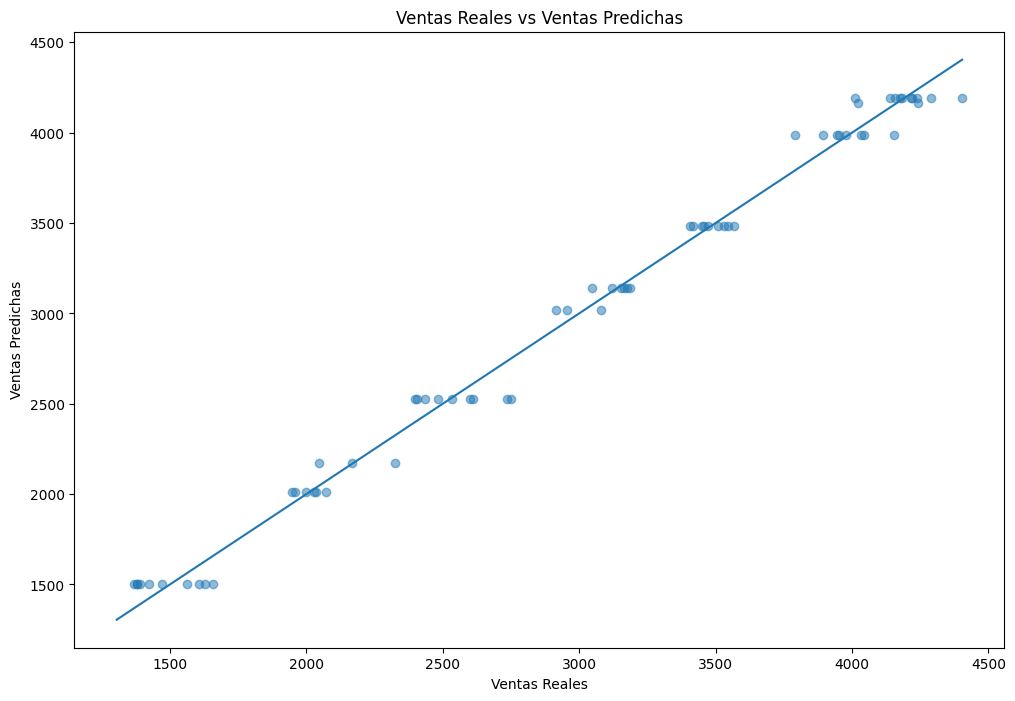

In [79]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test_2, predict, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs Ventas Predichas')

In [88]:
df_grahp = df.iloc[[i for i in range(0, 66)]]
df_grahp

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
61,2022-03-03,4,0,0,3080
62,2022-03-04,5,0,0,3532
63,2022-03-05,6,1,0,4021
64,2022-03-06,7,0,1,4215


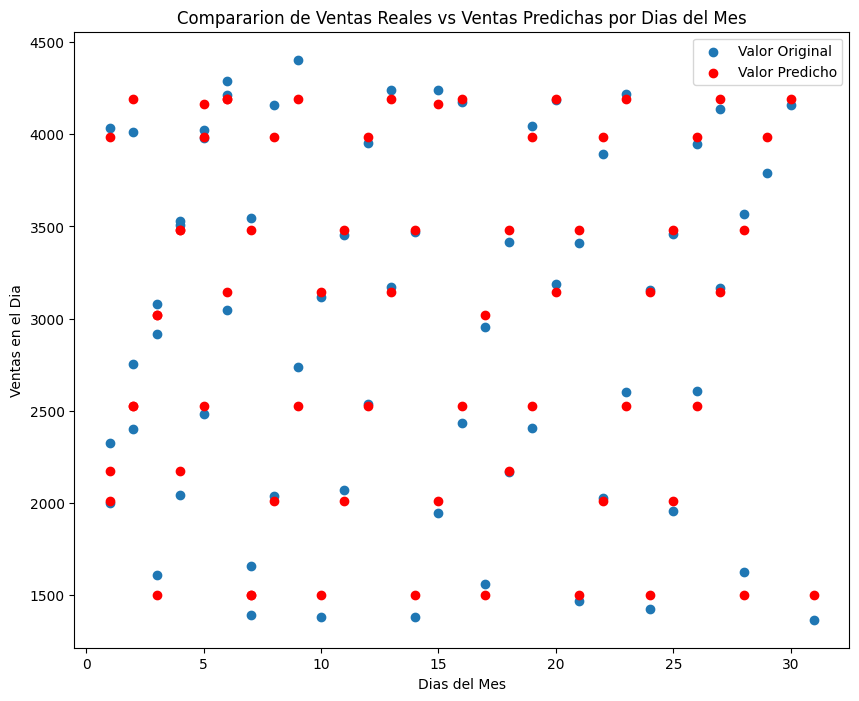

In [94]:
plt.figure(figsize=(10, 8))
plt.scatter(df_grahp['Fecha'].dt.day, y_test_2, label='Valor Original')
plt.scatter(df_grahp['Fecha'].dt.day, predict, c='red', label='Valor Predicho')
plt.xlabel('Dias del Mes')
plt.ylabel('Ventas en el Dia')
plt.title('Compararion de Ventas Reales vs Ventas Predichas por Dias del Mes')
plt.legend()
plt.show()

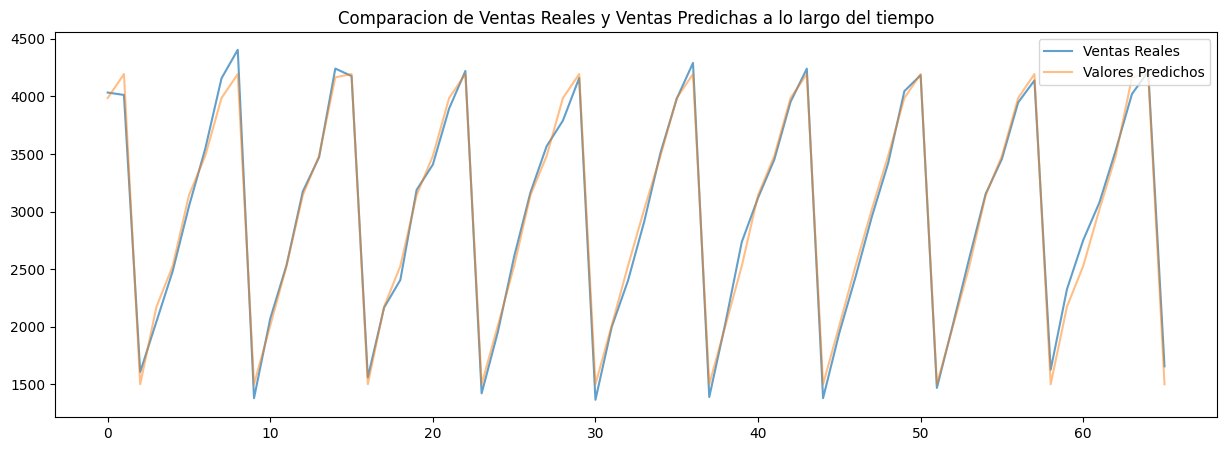

In [92]:
plt.figure(figsize=(15, 5))
plt.plot(y_test_2, label='Ventas Reales', alpha=0.7)
plt.plot(predict, label='Valores Predichos', alpha=0.5)
plt.legend(loc='upper right')
plt.title('Comparacion de Ventas Reales y Ventas Predichas a lo largo del tiempo')
plt.show()

In [58]:
mse = mean_squared_error(y_test_2, predict)
rmse = np.sqrt(mse)
rmse

np.float64(94.03705866048315)

#### Utilizando Regresion Lineal

In [59]:
modelo_2 = LinearRegression()
modelo_2.fit(X_entrena, y_entrena)

LinearRegression()

In [60]:
modelo_2.score(X_prueba, y_prueba)

0.9910212863051017

In [63]:
y_pred_2 = np.round(modelo_2.predict(X_prueba), 2)
y_pred_2

array([2505.51, 3000.27, 4205.15, 4205.15, 4205.15, 4205.15, 3495.02,
       3989.77, 3177.31, 3989.77, 1516.01, 2505.51, 2187.81, 3495.02,
       2505.51, 3495.02, 3989.77, 1516.01, 4166.81, 2010.76, 1516.01,
       2505.51, 1516.01, 4205.15, 2187.81, 3495.02, 2187.81, 3177.31,
       3495.02, 2505.51, 2505.51, 2010.76, 3989.77, 1516.01, 4166.81,
       1516.01, 4166.81])

In [65]:
print(list(y_prueba))

[2261, 2914, 4176, 4192, 4138, 4227, 3494, 4044, 3182, 4074, 1477, 2736, 2113, 3457, 2408, 3471, 4033, 1467, 4185, 2076, 1381, 2576, 1512, 4294, 2251, 3398, 2022, 3054, 3670, 2548, 2610, 1966, 3952, 1519, 4206, 1426, 4021]


In [ ]:
mse = mean_squared_error(y_prueba, y_pred_2)
rmse = np.sqrt(mse)
rmse

np.float64(94.27072919938503)

Text(0.5, 1.0, 'Ventas Reales vs Ventas Predichas')

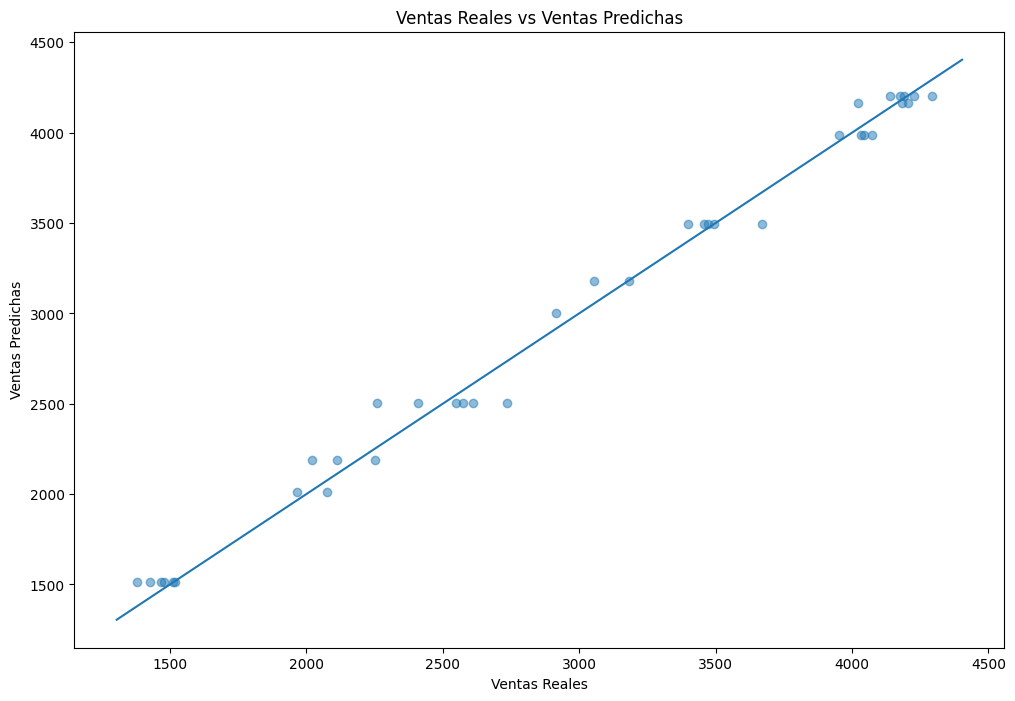

In [78]:
plt.figure(figsize=(12, 8))
plt.scatter(y_prueba, y_pred_2, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs Ventas Predichas')

In [80]:
df_test = pd.DataFrame({'Valores Reales': y_prueba, 'Valores Predichos': y_pred_2})
df_test.sort_index(inplace=True)
df_test

,Valores Reales,Valores Predichos
0,4033,3989.77
9,1381,1516.01
15,4176,4205.15
25,2610,2505.51
33,2914,3000.27
39,2736,2505.51
42,3952,3989.77
55,3457,3495.02
57,4138,4205.15
63,4021,4166.81


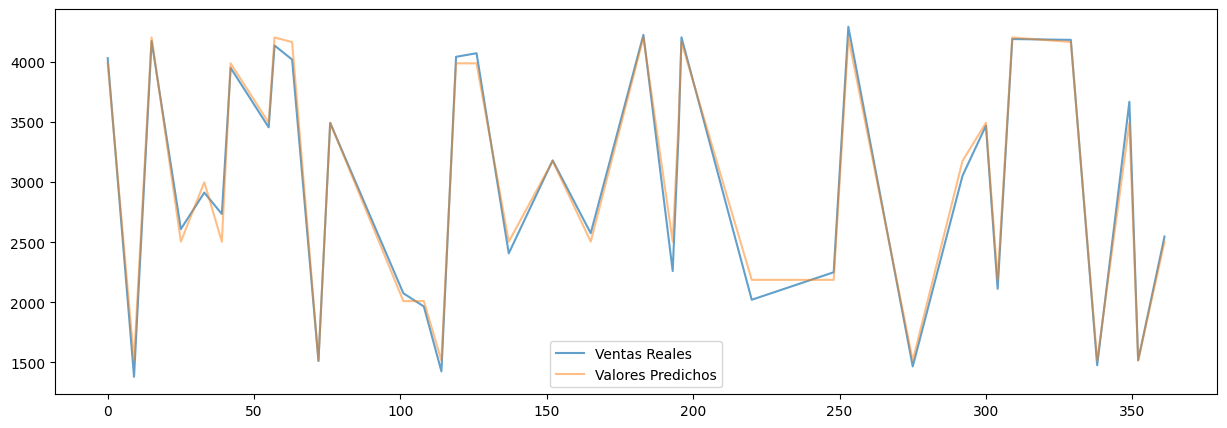

In [85]:
plt.figure(figsize=(15, 5))
plt.plot(df_test['Valores Reales'], label='Ventas Reales', alpha=0.7)
plt.plot(df_test['Valores Predichos'], label='Valores Predichos', alpha=0.5)
plt.legend()
plt.show()

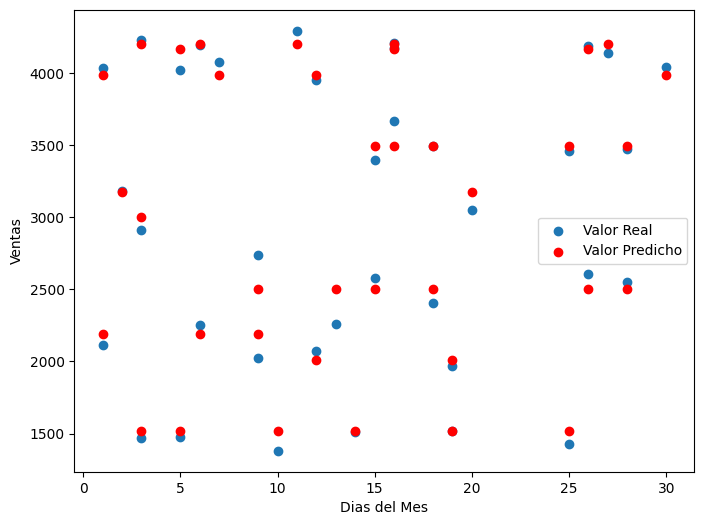

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(df_RL['Fecha'].dt.day, y_prueba, label='Valor Real')
plt.scatter(df_RL['Fecha'].dt.day, y_pred_2, c='red', label='Valor Predicho')
plt.xlabel('Dias del Mes')
plt.ylabel('Ventas')

plt.legend()
plt.show()

#### Conclusiones

- De acuerdo a los datos Analizados se ve claramente que los fines de semana son cuando mas se vende, por lo que se recomienda aplicar mas promociones estos dias para seguir aumentando las ventas.
- Gestionar el inventario para los fines de semana estar bien surtidos de material para no quedar sin stock debido a las altas ventas.
- El modelo Creado Predice de manera aceptable las ventas por lo que se muestra segun el patron que las ventas seguiran bajas para los primeros dias de la semana por lo que se recomienda hacer campañas de Marketing y Promociones para dichos dias y asi tratar de mejorar las ventas respectivas.
- Si es posible Crear promociones u Ofertas en el mes de Febrero, ya que es el mes con menor desempeño de ventas.
